# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import os
from pprint import pprint
from citipy import citipy
from config import api_key
from sklearn import datasets
from scipy.stats import linregress

## Generate Cities List

In [4]:
# Set Variable and lists
counter = 0
rndlat=[]
rndlon=[]

#Finds Latitude and Longitude for 600 randomly generated coordinates to allow for missing cities in API
while len(rndlat) < 600:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1 

#Create DataFrame of random coordinates
geo_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
geo_df.head()

#Create Empty lists for city
cities = []
country = []

#Loop through coordinates and find the nearest city's weather data
for index, row in geo_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    cities.append(str(city_name))
    country.append(country_code)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url + cities[0])

http://api.openweathermap.org/data/2.5/weather?appid=a6ec59617cbd1356d63a167852913fae&units=imperial&q=mazagao


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
hum = []
temp = []
cloud = []
windy = []
geo = []
country = []
lat = []
lng = []
nan = []

print("Beginning Data Retrieval\n-----------------------------\n")

# Loop through the list of cities and perform a request for data on each
for city in cities:     
    try:
        response = requests.get(query_url + city).json()
        geo.append(response["name"])
        country.append(response["sys"]["country"])
        hum.append(response["main"]["humidity"])
        temp.append(response["main"]["temp"])   
        cloud.append(response["clouds"]["all"]) 
        windy.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        code = response["id"]
        print(f"For {city} with ID number {code}")
    #Allows for cities missing from OpenWeather
    except KeyError:
        nan.append(city)

#Verify that of 600 cities not more than 100 are missing
print(len(nan))

Beginning Data Retrieval
-----------------------------

For mazagao with ID number3395042
For ushuaia with ID number3833367
For atuona with ID number4020109
For george with ID number1002145
For tasiilaq with ID number3424607
For bluff with ID number2206939
For carnarvon with ID number2074865
For atuona with ID number4020109
For okhotsk with ID number2122605
For ushuaia with ID number3833367
For thompson with ID number6165406
For ribeira grande with ID number3372707
For sola with ID number2134814
For quelimane with ID number1028434
For ucluelet with ID number6171633
For bredasdorp with ID number1015776
For ushuaia with ID number3833367
For kochevo with ID number546845
For mount isa with ID number2065594
For tuktoyaktuk with ID number6170031
For new norfolk with ID number2155415
For presidencia roque saenz pena with ID number3840300
For kochki with ID number1503061
For ushuaia with ID number3833367
For hermanus with ID number3366880
For emerald with ID number2167426
For salekhard with ID

For baisha with ID number1817446
For ponta do sol with ID number2264557
For mataura with ID number6201424
For georgetown with ID number1735106
For melilla with ID number2513947
For jamestown with ID number5122534
For tam ky with ID number1567148
For pisco with ID number3932145
For yellowknife with ID number6185377
For tiksi with ID number2015306
For anadyr with ID number2127202
For ladario with ID number3459352
For mataura with ID number6201424
For albany with ID number5106841
For provideniya with ID number4031574
For kingaroy with ID number2161376
For upernavik with ID number3418910
For asyut with ID number359783
For balvi with ID number461163
For baijiantan with ID number1529626
For alofi with ID number4036284
For golden with ID number5423294
For rikitea with ID number4030556
For hilo with ID number5855927
For ushuaia with ID number3833367
For shimoda with ID number1852357
For san benito with ID number3590389
For mataura with ID number6201424
For hilo with ID number5855927
For jamest

For muisne with ID number3653967
For belmonte with ID number3470137
For new norfolk with ID number2155415
For narsaq with ID number3421719
For qaanaaq with ID number3831208
For new norfolk with ID number2155415
For songjianghe with ID number2034691
For ushuaia with ID number3833367
For bluff with ID number2206939
For mezhdurechensk with ID number1498920
For new norfolk with ID number2155415
For kayerkan with ID number1497337
For rikitea with ID number4030556
For karacabey with ID number744537
For new norfolk with ID number2155415
For ushuaia with ID number3833367
For gien with ID number3016097
For iqaluit with ID number5983720
For saskylakh with ID number2017155
For acarau with ID number3408368
For hasaki with ID number2112802
For ushuaia with ID number3833367
For jamestown with ID number5122534
For charkhi dadri with ID number1274571
For bandarbeyla with ID number64814
For bluff with ID number2206939
For japura with ID number1642773
For iqaluit with ID number5983720
For castro with ID

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict = {
    "city": geo,
    "country": country,
    "humidity": hum,
    "temp": temp,
    "cloud":cloud,
    "windy":windy,
    "lat":lat,
    "lng":lng}
city_data = pd.DataFrame(weather_dict)


#Export to CSV
output_file = os.path.join("output_data", "City_Data.csv")
city_data.to_csv(output_file, index=False, header=True)

city_data.head()

,city,country,humidity,temp,cloud,windy,lat,lng
0,Mazagão,BR,74,86.00,20,9.17,-0.12,-51.29
1,Ushuaia,AR,86,33.80,75,26.40,-54.80,-68.30
2,Atuona,PF,79,77.56,30,24.29,-9.80,-139.03
3,George,ZA,93,48.20,18,3.36,-33.96,22.46
4,Tasiilaq,GL,80,35.60,0,1.12,65.61,-37.64


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
indices = city_data.index[city_data["humidity"] >= 100]
print(len(indices))
print(indices)

6
Int64Index([72, 90, 299, 429, 469, 515], dtype='int64')


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Drop data by index (matching list indices) then input to new df 
clean_city_data = city_data.drop(index=indices)

#Verify data was dropped
print(len(city_data)),print(len(clean_city_data))

clean_city_data.head()

540
534


,city,country,humidity,temp,cloud,windy,lat
0,Jamestown,US,72,64.06,75,10.29,42.10
1,Nago,JP,88,80.98,1,7.65,26.59
2,Qandala,SO,54,90.63,3,5.79,11.47
3,Katsuura,JP,86,81.48,98,11.99,35.13
4,Busselton,AU,53,46.31,0,10.74,-33.65


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

'This graph shows a general trend of higher temperatures closer \nto the equator, with declining temps as the latitudes move to \nthe polar regions'

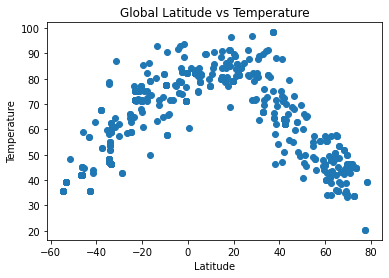

In [16]:
#Data into axis
x_axis = clean_city_data["lat"]
y_axis = clean_city_data["temp"]

#Labels
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Global Latitude vs Temperature")

#Put into scatter plot
plt.scatter(x_axis,y_axis)

"""This graph shows a general trend of higher temperatures closer 
to the equator, with declining temps as the latitudes move to 
the polar regions"""

## Latitude vs. Humidity Plot

"I don't see a trend that stands out here, the data really only\ntells me that their are more cities that have a 60% to %80 relative \nhumidity. If I had to guess I would say that correlates with most \nof worlds population living next to a body of water or where water \nis readily available."

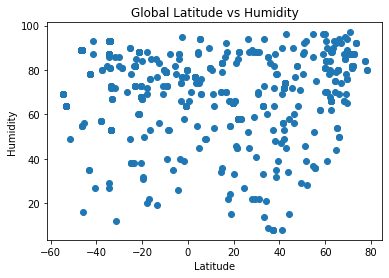

In [17]:
#Data into axis
x_axis = clean_city_data["lat"]
y_axis = clean_city_data["humidity"]

#Labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Global Latitude vs Humidity")

#Put into scatter plot
plt.scatter(x_axis,y_axis)

"""I don't see a trend that stands out here, the data really only
tells me that their are more cities that have a 60% to %80 relative 
humidity. If I had to guess I would say that correlates with most 
of worlds population living next to a body of water or where water 
is readily available."""

## Latitude vs. Cloudiness Plot

'The consistency of straight lines at the cloudiness %\nat 0, 20, 40, 75, and 100 tells me a person looks outside and says\nyeah today looks about this amount of cloudy and is thus a qualitative\nvalue rather than a quantitative one.'

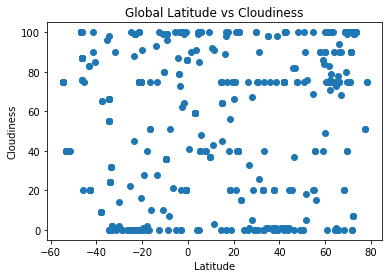

In [18]:
#Data into axis
x_axis = clean_city_data["lat"]
y_axis = clean_city_data["cloud"]

#Labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Global Latitude vs Cloudiness")

#Put into scatter plot
plt.scatter(x_axis,y_axis)

"""The consistency of straight lines at the cloudiness %
at 0, 20, 40, 75, and 100 tells me a person looks outside and says
yeah today looks about this amount of cloudy and is thus a qualitative
value rather than a quantitative one."""

## Latitude vs. Wind Speed Plot

'Their are more cities in the northern hemishpere that are concentrated\naround the lats of 20 40 and 60. They are also concentrated at wind speeds \nof around 5mph, suggesting that something moderates the wind speeds. I \nbelieve this suggests that their are more cities concentrated in the northern \nhemisphere and those cities are close to the ocean where breezes tend to be\nconsistent but of low speed.'

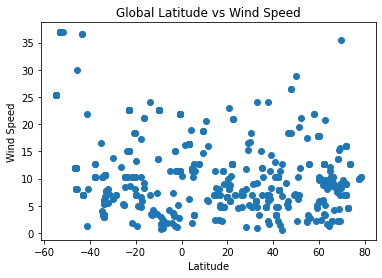

In [19]:
#Data into axis
x_axis = clean_city_data["lat"]
y_axis = clean_city_data["windy"]

#Labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Global Latitude vs Wind Speed")

#Put into scatter plot
plt.scatter(x_axis,y_axis)

"""Their are more cities in the northern hemishpere that are concentrated
around the lats of 20 40 and 60. They are also concentrated at wind speeds 
of around 5mph, suggesting that something moderates the wind speeds. I 
believe this suggests that their are more cities concentrated in the northern 
hemisphere and those cities are close to the ocean where breezes tend to be
consistent but of low speed."""

## Linear Regression

In [20]:
#Separates cities into north and south hemishpere
north_df = clean_city_data[clean_city_data["lat"]>=0]
south_df = clean_city_data[clean_city_data["lat"]<0]

north_df.head()

,city,country,humidity,temp,cloud,windy,lat
0,Jamestown,US,72,64.06,75,10.29,42.10
1,Nago,JP,88,80.98,1,7.65,26.59
2,Qandala,SO,54,90.63,3,5.79,11.47
3,Katsuura,JP,86,81.48,98,11.99,35.13
8,Kearney,US,47,75.20,1,10.29,40.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7518310273443033


'There is a direct correlations between latitude and temperature'

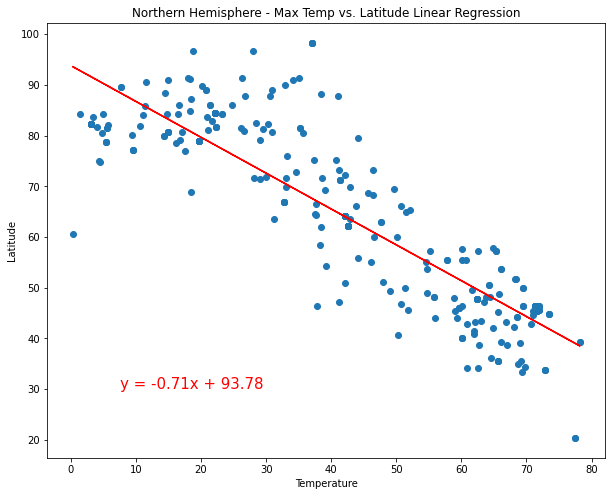

In [21]:
x_values = north_df['lat']
y_values = north_df['temp']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")

plt.savefig(os.path.join("images","north_temp_lat.png"))

"""There is a direct correlation between latitude and temperature"""

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7518310273443033


'There is a direct correlation between latitude and temperature.'

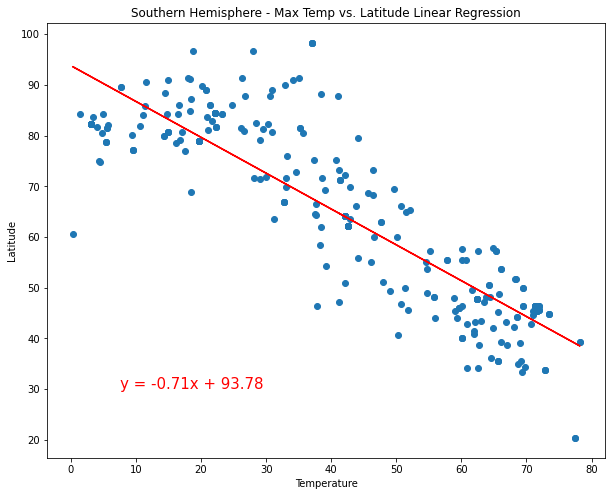

In [22]:
x_values = north_df['lat']
y_values = north_df['temp']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")

plt.savefig(os.path.join("images","south_temp_lat.png"))

"""There is a direct correlation between latitude and temperature."""

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.048188977050318764


'No correlation between latitude and humidity'

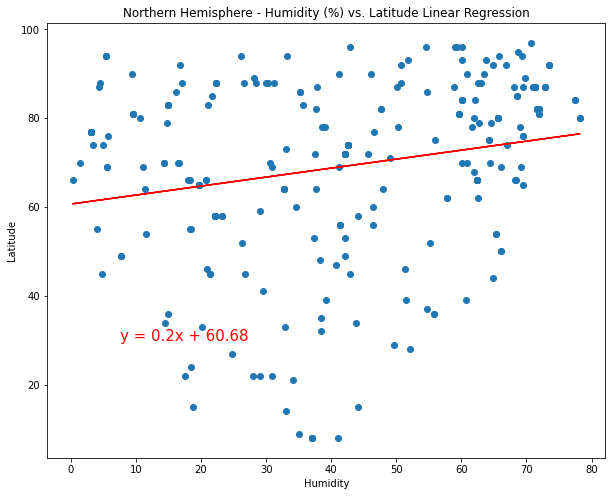

In [23]:
x_values = north_df['lat']
y_values = north_df['humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")

plt.savefig(os.path.join("images","north_hum_lat.png"))

"""No correlation between latitude and humidity"""

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00302814897416989


'No correlation between latitude and humidity'

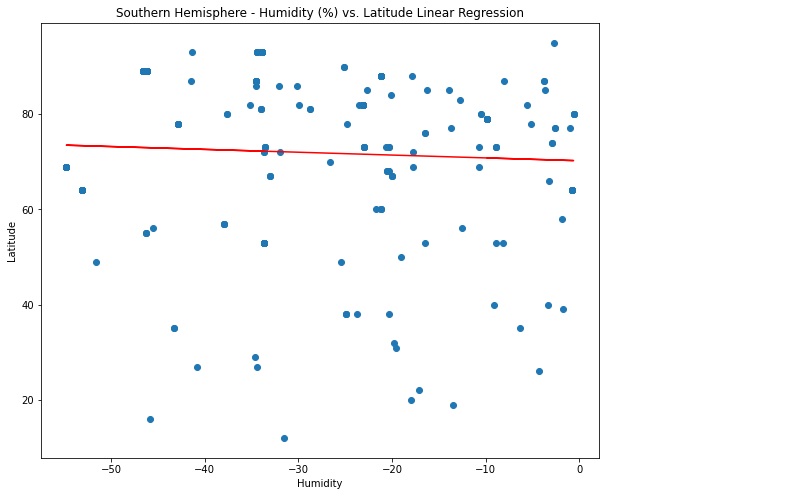

In [24]:
x_values = south_df['lat']
y_values = south_df['humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")

plt.savefig(os.path.join("images","south_hum_lat.png"))

"""No correlation between latitude and humidity"""

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.023400011173875267


'No correlation between cloudiness and latitude'

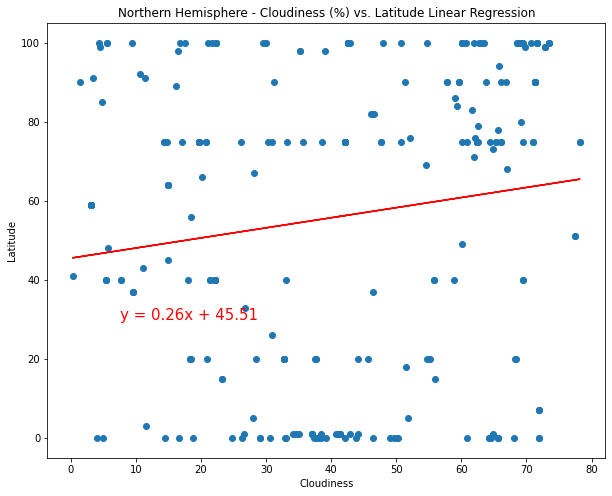

In [25]:
x_values = north_df['lat']
y_values = north_df['cloud']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")

plt.savefig(os.path.join("images","north_cloud_lat.png"))

"""No correlation between cloudiness and latitude"""

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011517444476028288


'No correlation between cloudiness and latitude'

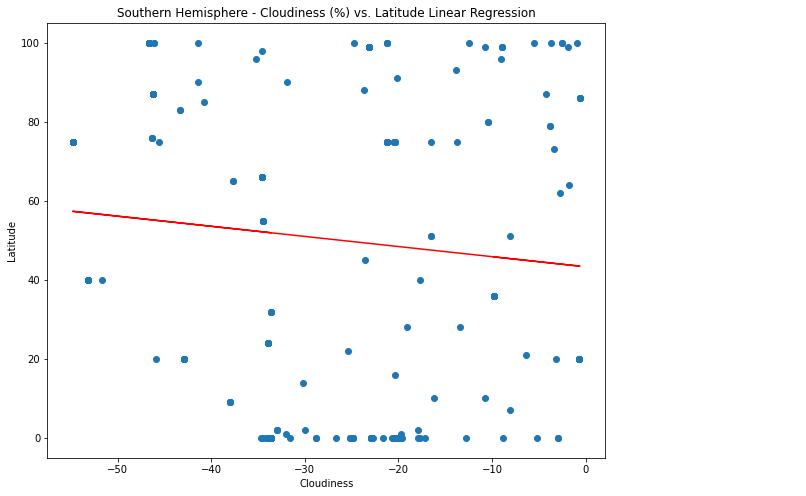

In [26]:
x_values = south_df['lat']
y_values = south_df['cloud']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")

plt.savefig(os.path.join("images","south_cloud_lat.png"))

"""No correlation between cloudiness and latitude"""

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004319071953532472


'no correlation between lattitude and wind speed'

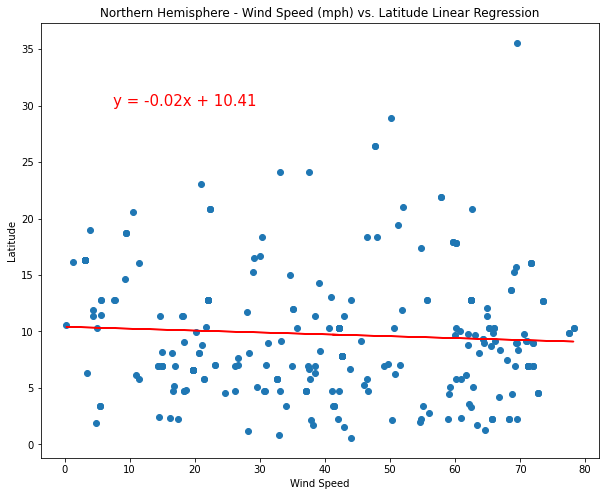

In [27]:
x_values = north_df['lat']
y_values = north_df['windy']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")

plt.savefig(os.path.join("images","north_wind_lat.png"))

"""no correlation between lattitude and wind speed"""

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08940385087932713


'No correlation between latitude and wind speed'

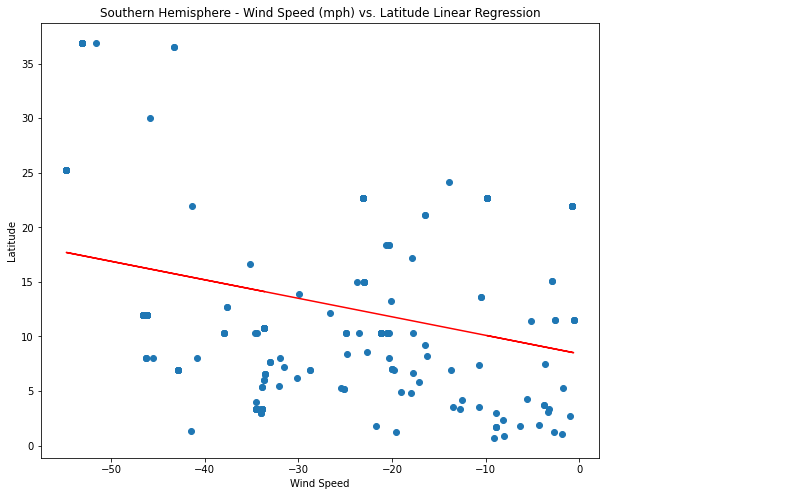

In [28]:
x_values = south_df['lat']
y_values = south_df['windy']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")

plt.savefig(os.path.join("images","south_wind_lat.png"))

"""No correlation between latitude and wind speed"""